In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-games-rating-by-esrb/test_esrb.csv
/kaggle/input/video-games-rating-by-esrb/Video_games_esrb_rating.csv


Let's answer 3 KBQs
1. Can we see if there's stark distiction between Teen, E10, and M for model prediction
2. Can we see if there's a need for an inbetween label
3. Can we predict what will be the indicators of the inbetween variables

KQB1:1. Can we see if there's stark distiction between Teen, E10, and M for model prediction
 
Let's get the data and start shaping the dataframe

In [49]:
videogame = pd.read_csv("/kaggle/input/video-games-rating-by-esrb/Video_games_esrb_rating.csv")

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


In [3]:
videogame.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [4]:
videogame.shape

(1895, 34)

In [5]:
videogame2 = pd.get_dummies(videogame, columns=['esrb_rating']).copy()

In [6]:
videogame2.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [7]:
videogame2.shape

(1895, 37)

In [8]:
videogame3 = videogame2.drop(['title','console'],axis=1).copy()

In [9]:
videogame3.head()

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1


In [10]:
videogame3.shape

(1895, 35)

In [11]:
#Get the ratings columns
ratings=['esrb_rating_E','esrb_rating_ET','esrb_rating_M','esrb_rating_T']

<AxesSubplot:>

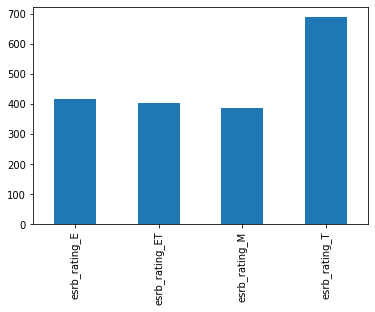

In [119]:
videogame3[ratings].sum().plot(kind='bar')

Teen followed by E10 are the top 2 ratings in this dataset

In [12]:
#ML techqiues to use
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [13]:
#Let's use test size of 30% for validation
X_train, X_test, Y_train, Y_test = train_test_split(videogame3.drop(ratings, axis=1),\
                                                   videogame3[ratings], test_size=0.3,random_state=531)
#We use random_state=531 to allow for replicability

Let's first tackle predicting the Teen Rating since it's the largest

In [14]:
vglr = LogisticRegressionCV(random_state=531)
vglr2 = vglr.fit(X_train,Y_train['esrb_rating_T'])

In [15]:
Y_pred = vglr2.predict(X_test)

In [16]:
Y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [17]:
from sklearn.metrics import accuracy_score,f1_score

In [18]:
#Get LR accuarcy
accuracy_score(Y_test['esrb_rating_T'], Y_pred)

0.8611599297012302

In [19]:
#Get LR f1 score
f1_score(Y_test['esrb_rating_T'], Y_pred)

0.8020050125313284

So we see Linear regression having a score, let's see if we can beat it

In [20]:
vgrf = RandomForestClassifier(random_state=531)
vgrf2 = vgrf.fit(X_train,Y_train['esrb_rating_T'])

In [21]:
Y_pred = vgrf2.predict(X_test)

In [22]:
#Get RF accuarcy
accuracy_score(Y_test['esrb_rating_T'], Y_pred)

0.8681898066783831

In [23]:
#Get RF f1 score
f1_score(Y_test['esrb_rating_T'], Y_pred)

0.8175182481751825

In [24]:
vgxgb = xgb.XGBClassifier(random_state=531)
vgxgb2 = vgxgb.fit(X_train,Y_train['esrb_rating_T'])

In [25]:
Y_pred = vgxgb2.predict(X_test)

In [26]:
#Get XGB accuarcy
accuracy_score(Y_test['esrb_rating_T'], Y_pred)

0.8804920913884007

In [27]:
#Get RF f1 score
f1_score(Y_test['esrb_rating_T'], Y_pred)

0.8341463414634146

We see that XGB gives the best accuracy and F1 Score, two measures we know help in classifying what is Teen related and if the model can tell when the data leads to Teen label and not lead to Teen Label.

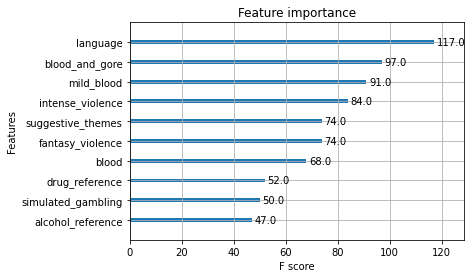

In [71]:
import matplotlib.pylab as plt
from matplotlib import pyplot
from xgboost import plot_importance
plot_importance(vgxgb2, max_num_features=10) # top 10 most important features
plt.show()

We see the top 10 variables for contributing for Teens.  CAn we do the same for Mature and E-10?

In [72]:
vgxgbet = xgb.XGBClassifier(random_state=531)
vgxgb2et = vgxgbet.fit(X_train,Y_train['esrb_rating_T'])

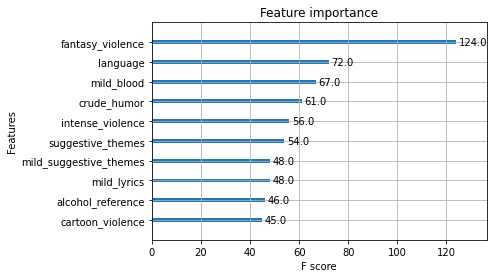

In [73]:
plot_importance(vgxgb2et, max_num_features=10) # top 10 most important features
plt.show()

In [74]:
vgxgbM = xgb.XGBClassifier(random_state=531)
vgxgb2M = vgxgbM.fit(X_train,Y_train['esrb_rating_M'])

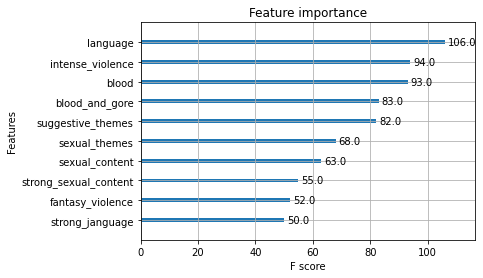

In [75]:
plot_importance(vgxgb2M, max_num_features=10) # top 10 most important features
plt.show()

Spotting the dataset, what we see is that for M there's distinction but for E10 and Teen there's a bit of confusion.  Maybe there's a need to create a new label.
Let's create a new rating category first by creating a clustering system

KBQ2. Can we see if there's a need for an inbetween label for rating


In [28]:
from sklearn.cluster import KMeans

In [29]:
vgcluster = KMeans(5, random_state=531)

In [30]:
vgcluster2 = vgcluster.fit(X_train)

In [31]:
rate_clust = Y_train.copy()

In [32]:
rate_clust = rate_clust.reset_index()
rate_clust['cluster'] = pd.Series(vgcluster2.predict(X_train))

In [93]:
rate_clust.head()

,index,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T,cluster
0,1386,0,0,0,1,4
1,982,0,0,0,1,2
2,1401,0,0,1,0,4
3,1276,0,0,1,0,2
4,469,0,0,1,0,4


We can see that certain ratings are linked to certain groups.  Let's see the correlation

In [33]:
rate_clust2 = pd.get_dummies(rate_clust, columns=['cluster']).copy()
rate_clust2.drop('index', axis=1).corr('spearman')

,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
esrb_rating_E,1.000000,-0.265782,-0.275000,-0.396941,-0.201100,-0.256504,0.092480,0.679161,-0.288448
esrb_rating_ET,-0.265782,1.000000,-0.265782,-0.383635,-0.194359,0.581293,0.041881,-0.179575,-0.278779
esrb_rating_M,-0.275000,-0.265782,1.000000,-0.396941,0.539313,-0.228631,-0.243833,-0.228124,0.245624
esrb_rating_T,-0.396941,-0.383635,-0.396941,1.000000,-0.126205,-0.072457,0.094266,-0.235025,0.270208
cluster_0,-0.201100,-0.194359,0.539313,-0.126205,1.000000,-0.187574,-0.243496,-0.166820,-0.210934
cluster_1,-0.256504,0.581293,-0.228631,-0.072457,-0.187574,1.000000,-0.310581,-0.212781,-0.269048
cluster_2,0.092480,0.041881,-0.243833,0.094266,-0.243496,-0.310581,1.000000,-0.276217,-0.349259
cluster_3,0.679161,-0.179575,-0.228124,-0.235025,-0.166820,-0.212781,-0.276217,1.000000,-0.239279
cluster_4,-0.288448,-0.278779,0.245624,0.270208,-0.210934,-0.269048,-0.349259,-0.239279,1.000000


We can see through the correlation that there's muddiess in Teen for positive correlations but let's test it out.

In [34]:
Y_cluster = vgcluster2.predict(X_test)

In [35]:
Y_cluster

array([4, 3, 3, 1, 1, 3, 1, 0, 4, 4, 2, 4, 0, 2, 0, 1, 1, 4, 4, 3, 2, 4,
       2, 4, 3, 2, 2, 0, 0, 4, 1, 2, 0, 4, 1, 2, 3, 3, 1, 3, 0, 3, 3, 2,
       1, 4, 2, 3, 2, 4, 1, 4, 2, 2, 4, 4, 3, 2, 2, 0, 3, 1, 1, 3, 2, 2,
       3, 2, 2, 2, 1, 1, 2, 3, 3, 2, 1, 2, 2, 3, 2, 3, 3, 1, 2, 2, 4, 1,
       4, 4, 3, 4, 1, 3, 4, 3, 2, 4, 3, 4, 4, 4, 1, 2, 1, 1, 2, 1, 3, 1,
       2, 0, 4, 2, 2, 1, 3, 4, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 3,
       4, 2, 1, 4, 4, 4, 1, 2, 1, 4, 0, 2, 0, 1, 1, 4, 1, 2, 3, 4, 2, 4,
       2, 1, 0, 2, 4, 0, 1, 2, 1, 2, 2, 4, 4, 2, 0, 1, 1, 4, 4, 2, 1, 2,
       4, 1, 4, 2, 4, 3, 1, 0, 3, 3, 4, 1, 4, 0, 0, 4, 0, 3, 4, 3, 3, 3,
       4, 4, 1, 2, 2, 0, 1, 3, 2, 2, 0, 3, 2, 4, 2, 1, 4, 2, 1, 3, 2, 2,
       1, 2, 2, 4, 0, 3, 4, 2, 3, 0, 3, 4, 2, 2, 2, 0, 2, 4, 1, 4, 2, 1,
       3, 3, 2, 3, 1, 2, 3, 4, 4, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 4, 1, 0,
       2, 2, 1, 2, 2, 0, 0, 4, 1, 2, 1, 2, 1, 1, 1, 0, 2, 3, 4, 1, 2, 1,
       1, 1, 2, 1, 1, 4, 1, 1, 1, 2, 3, 4, 3, 2, 1,

We have the cluster labels let's try to see which labels align with labels

In [36]:
Y_test

,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T
1483,0,0,0,1
394,1,0,0,0
753,1,0,0,0
259,0,0,0,1
621,0,1,0,0
...,...,...,...,...
580,0,1,0,0
401,0,0,0,1
1571,0,1,0,0
96,1,0,0,0


In [37]:
rate_clust_test = Y_test.copy()
rate_clust_test = rate_clust_test.reset_index()
rate_clust_test['cluster'] = pd.Series(Y_cluster)

In [38]:
rate_clust_test.head(20)

,index,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T,cluster
0,1483,0,0,0,1,4
1,394,1,0,0,0,3
2,753,1,0,0,0,3
3,259,0,0,0,1,1
4,621,0,1,0,0,1
5,245,1,0,0,0,3
6,562,0,1,0,0,1
7,1190,0,0,1,0,0
8,1378,0,0,0,1,4
9,1016,0,0,1,0,4


In [39]:
rate_clust_test_2 = pd.get_dummies(rate_clust_test, columns=['cluster']).copy()
rate_clust_test_2.drop('index', axis=1).corr('spearman')

,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
esrb_rating_E,1.000000,-0.299079,-0.252800,-0.409939,-0.197119,-0.278351,0.045513,0.699481,-0.270892
esrb_rating_ET,-0.299079,1.000000,-0.255320,-0.414025,-0.199083,0.540447,0.057765,-0.193790,-0.273592
esrb_rating_M,-0.252800,-0.255320,1.000000,-0.349960,0.564282,-0.214934,-0.249804,-0.210597,0.252978
esrb_rating_T,-0.409939,-0.414025,-0.349960,1.000000,-0.101577,-0.060618,0.108112,-0.273432,0.275817
cluster_0,-0.197119,-0.199083,0.564282,-0.101577,1.000000,-0.185285,-0.241412,-0.164211,-0.180320
cluster_1,-0.278351,0.540447,-0.214934,-0.060618,-0.185285,1.000000,-0.340897,-0.231882,-0.254630
cluster_2,0.045513,0.057765,-0.249804,0.108112,-0.241412,-0.340897,1.000000,-0.302124,-0.331763
cluster_3,0.699481,-0.193790,-0.210597,-0.273432,-0.164211,-0.231882,-0.302124,1.000000,-0.225669
cluster_4,-0.270892,-0.273592,0.252978,0.275817,-0.180320,-0.254630,-0.331763,-0.225669,1.000000


#Yep, there's an issue, let's look into what predicts cluster 2

In [40]:
rate_clust2['cluster_2'].head()

0    0
1    1
2    0
3    1
4    0
Name: cluster_2, dtype: uint8

In [42]:
new_class_model = xgb.XGBClassifier(random_state=531)


In [43]:
new_class_model2 = new_class_model.fit(X_train, rate_clust2['cluster_2'])

In [44]:
ncm_pred = new_class_model2.predict(X_train)

In [46]:
#Get XGB accuarcy
accuracy_score(rate_clust2['cluster_2'], ncm_pred)#

1.0

In [45]:

#Get XGB f1 score
f1_score(rate_clust2['cluster_2'], ncm_pred)

1.0

In [47]:
#Get XGB accuarcy
accuracy_score(rate_clust_test_2['cluster_2'], new_class_model2.predict(X_test))#

1.0

In [48]:

#Get XGB f1 score
f1_score(rate_clust_test_2['cluster_2'], new_class_model2.predict(X_test))

1.0

We're getting susspicously high scores, so let's check the importance plot


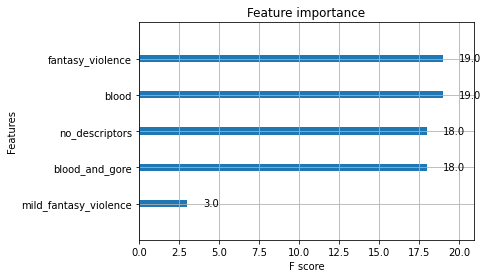

In [77]:
plot_importance(new_class_model2, max_num_features=10) # top 10 most important features
plt.show()
#We see 'no descripters', so let's remove that variable and try again.

In [80]:
new_class_model = xgb.XGBClassifier(random_state=531)
new_class_model2 = new_class_model.fit(X_train.drop('no_descriptors',axis=1), rate_clust2['cluster_2'])
ncm_pred = new_class_model2.predict(X_train.drop('no_descriptors',axis=1))
print(accuracy_score(rate_clust2['cluster_2'], ncm_pred))
print(f1_score(rate_clust2['cluster_2'], ncm_pred))

0.9766214177978884
0.9593709043250327


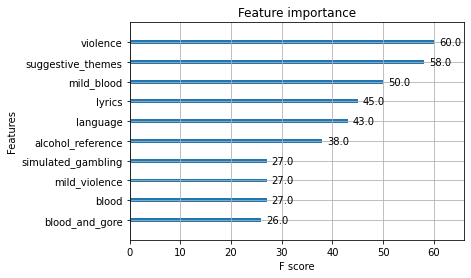

In [92]:
plot_importance(new_class_model2, max_num_features=10) # top 10 most important features
plt.show()

Okay now that makes sense, now let's test it in a new dataset


KBQ3. Can we find candidates for the new label 

In [81]:
test_esrb = pd.read_csv("/kaggle/input/video-games-rating-by-esrb/test_esrb.csv")

In [83]:
test_esrb2 = test_esrb.drop(['title','console','no_descriptors'],axis=1).copy()

In [84]:
test_esrb_pred = new_class_model2.predict(test_esrb2.drop(['esrb_rating'],axis=1))

In [85]:
test_esrb_check = test_esrb.copy()
test_esrb_check['cluster_2'] = pd.Series(test_esrb_pred)

In [86]:
test_esrb_check.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,cluster_2
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,T,0
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,E,0
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,T,0
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,E,0
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,ET,1


In [87]:
test_esrb_check.groupby(['cluster_2','esrb_rating']).count()

title  console  alcohol_reference  animated_blood  \
cluster_2 esrb_rating                                                      
0         E               58       58                 58              58   
          ET              99       99                 99              99   
          M               85       85                 85              85   
          T              128      128                128             128   
1         E               42       42                 42              42   
          ET              27       27                 27              27   
          M                5        5                  5               5   
          T               56       56                 56              56   

                       blood  blood_and_gore  cartoon_violence  crude_humor  \
cluster_2 esrb_rating                                                         
0         E               58              58                58           58   
          ET              99              99                99           99   
          M               85              85                85           85   
          T              128             128               128          128   
1         E               42              42                42           42   
          ET              27              27                27           27   
          M                5               5                 5            5   
          T               56              56                56           56   

                       drug_reference  fantasy_violence  ...  partial_nudity  \
cluster_2 esrb_rating                                    ...                   
0         E                        58                58  ...              58   
          ET                       99                99  ...              99   
          M                        85                85  ...              85   
          T                       128               128  ...             128   
1         E                        42                42  ...              42   
          ET                       27                27  ...              27   
          M                         5                 5  ...               5   
          T                        56                56  ...              56   

                       sexual_content  sexual_themes  simulated_gambling  \
cluster_2 esrb_rating                                                      
0         E                        58             58                  58   
          ET                       99             99                  99   
          M                        85             85                  85   
          T                       128            128                 128   
1         E                        42             42                  42   
          ET                       27             27                  27   
          M                         5              5                   5   
          T                        56             56                  56   

                       strong_janguage  strong_sexual_content  \
cluster_2 esrb_rating                                           
0         E                         58                     58   
          ET                        99                     99   
          M                         85                     85   
          T                        128                    128   
1         E                         42                     42   
          ET                        27                     27   
          M                          5                      5   
          T                         56                     56   

                       suggestive_themes  use_of_alcohol  \
cluster_2 esrb_rating                                      
0         E                           58              58   
          ET                          99              99   
          M       

In [88]:
test_esrb_check['teen_check'] = test_esrb_check[['cluster_2','esrb_rating']].apply(lambda x: 1 if (x[0]==1 and x[1]=='T') else 0,axis=1)
test_esrb_check2 = pd.get_dummies(test_esrb_check,columns=['esrb_rating'])

In [89]:
test_esrb_check2.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,cluster_2,teen_check,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [90]:
accuracy_score(test_esrb_check2['esrb_rating_T'], test_esrb_check2['teen_check']).ravel()


array([0.744])

In [91]:
f1_score(test_esrb_check2['esrb_rating_T'], test_esrb_check2['teen_check']).ravel()


array([0.46666667])

We see that while we have an acceptable accuracy for predictionr the middle between the Teen label, the F1 score shows that it's harder to make the decernment between Teen laebls and non-teen labels give the categorization of the cluster.  It demonstrates that we should look for a new label for somethign that handles the edge cases of Teens.

Let's look at potential candidates

In [94]:
candidates = test_esrb_check[test_esrb_check['teen_check']==1]

In [105]:
pd.set_option('display.max_columns', None)
candidates.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,cluster_2,teen_check
9,NARUTO SHIPPUDEN™: Ultimate Ninja® STORM 2,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,T,1,1
11,NARUTO™: Ultimate Ninja® STORM,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,T,1,1
13,One Piece: Unlimited World Red Deluxe Edition,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,T,1,1
27,Marvel's Guardians of the Galaxy: The Telltale...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,T,1,1
34,The Escapists 2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,T,1,1


<AxesSubplot:>

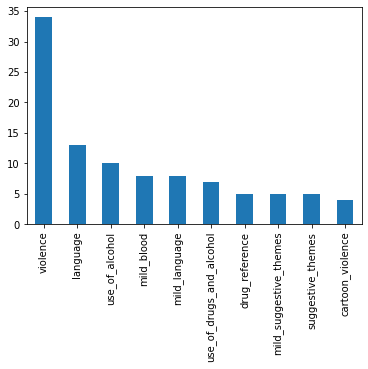

In [103]:
candidates.drop(['esrb_rating','teen_check','title','console'],axis=1).groupby('cluster_2').sum().max().nlargest(10).plot(kind='bar')

In [116]:
#Lets sort to get the max values 
candidates.sort_values(by=['cluster_2','violence','language','use_of_alcohol','mild_blood',\
                            'mild_language', 'use_of_drugs_and_alcohol','drug_reference',\
                          'mild_suggestive_themes', 'suggestive_themes','cartoon_violence'],ascending=False).head(10

In [116]:
)

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,cluster_2,teen_check
27,Marvel's Guardians of the Galaxy: The Telltale...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,T,1,1
312,Marvel's Guardians of the Galaxy: The Telltale...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,T,1,1
99,Super Cloudbuilt,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,T,1,1
181,Mr Shifty,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,T,1,1
185,Damascus Gear: Operation Tokyo HD Edition,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,T,1,1
271,Statik,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,T,1,1
390,Unearthing Mars,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,T,1,1
403,Dying : Reborn VR,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,T,1,1
408,StarBlood Arena,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,T,1,1
102,Marvel vs. Capcom: Infinite,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,T,1,1


We se that Marvel based works, Guardian of the Galaxy and Marvel vs Capcom Infinite, as well as other action titles would qualify for a look into the new label candidates